In [2]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt

import scipy 
from scipy.special import legendre
import time
import math
from scipy.linalg import expm

In [ ]:
e1=1
e2=1
J12=0.7
basis='legendre'

X=np.array([[0,1],[1,0]])
Y=np.array([[0,-1j],[1j,0]])
Z=np.array([[1,0],[0,-1]])
I=np.array([[1,0],[0,1]])

Hsys=e1/2*(np.kron(I,I)-np.kron(Z,I))+e2/2*(np.kron(I,I)-np.kron(I,Z))+J12*(np.kron(Y,Y)+np.kron(X,X))/4
H=[np.kron(X,I),np.kron(I,X)]

psi0=np.array([1/np.sqrt(2),1/np.sqrt(2),0,0])
coeff=np.array([0,0,0,0,0,0])

n_basis=3
T=1

def sigmoid(x):
    if x>0:
        return (1-math.exp(-x)) / (1 + math.exp(-x))
    else:
        return (math.exp(x)-1) / (math.exp(x) + 1)
    
def legendre(n,x):
    if n==0:
        return 1
    elif n==1:
        return x
    elif n==2:
        return (3*x**2-1)/2

def u(i,t):
    u=0
    n=n_basis
    for j in range(n):
        if basis == 'legendre':
            u+=coeff[i*n+j]*legendre(j,2*t/T-1)
        elif  basis == 'exponent':
            u+=coeff[i*n+j]*(-t/T)**j
    u=sigmoid(u)
    return u

def trotter1(psi0,t_start,t_end,n_step=25):
    psi=psi0
    T=t_end-t_start

    dt=T/n_step
    for i in range(n_step):
        U=expm(-1j*dt*(Hsys+u(0,t_start+i*dt)*H[0]+u(1,t_start+i*dt)*H[1]))
        psi=U@psi
    return psi

def computeM1():
    M=np.zeros((2*n_basis,2*n_basis))
    
    for i1 in range(2):
        for j1 in range(n_basis):
            for i2 in range(2):
                for j2 in range(n_basis):
                    t=np.linspace(T/20,T*19/20,10)
                    z=np.zeros(100)
                    U_0tot=np.zeros((10,4,4),dtype=complex)
                    U_ttoT=np.zeros((10,4,4),dtype=complex)
                    Utt=np.zeros((9,4,4),dtype=complex)
                    for i in range(9):
                        Utt[i]=trotter_U(T*(i+0.5)/10,T*(i+1.5)/10)
                    Ut=trotter_U(0,T/20)
                    U_0tot[0]=Ut
                    for i in range(9):
                        Ut=Utt[i]@Ut
                        U_ttoT[i+1]=Ut
                    Ut=trotter_U(T*19/20,T)
                    U_ttoT[9]=Ut
                    for i in range(9):
                        Ut=Ut@Utt[8-i]
                        U_0tot[8-i]=Ut
                    for i in range(10):
                        for j in range(10):
                            psi1=U_0tot[i]@psi0
                            psi1=Hs[i1]@psi1
                            psi1=U_ttoT[i]@psi1
                            psi2=U_0tot[j]@psi0
                            psi2=Hs[i2]@psi2
                            psi2=U_ttoT[j]@psi2
                            du1=0.5*(1+u(i1,t[i]))*(1-u(i1,t[i]))*legendre(j1,2*t[i]/T-1)
                            du2=0.5*(1+u(i2,t[j]))*(1-u(i2,t[j]))*legendre(j2,2*t[j]/T-1)
                            z[i*10+j]=(du1*du2*np.conjugate(psi2)@psi1).real
                    M[i1*n_basis+j1][i2*n_basis+j2]=np.mean(z)*np.mean(z)*(T**2)
    return M 

def m(t1,t2,i1,i2,j1,j2):
    psi1=trotter1(psi0,0,t1)
    psi1=0.5*(1-u(i1,t1)**2)*legendre(j1,2*t1/T-1)*H[i1]@psi1
    psi1=trotter1(psi1,t1,T)
    psi2=trotter1(psi0,0,t2)
    psi2=0.5*(1-u(i2,t2)**2)*legendre(j2,2*t2/T-1)*H[i2]@psi2
    psi2=trotter1(psi2,t2,T)
    return (np.conjugate(psi1)@psi2).real

m=np.vectorize(m)
turn=1
for i1 in range(1):
    for j1 in range(n_basis):
        for i2 in range(2):
            for j2 in range(j1,n_basis):
                x = np.linspace(0, T, 100)
                y = np.linspace(0, T, 100)
                X, Y = np.meshgrid(x, y)
                Z = m(X,Y,i1,i2,j1,j2)
                fig = plt.figure()
                ax = fig.add_subplot(projection='3d')
                ax.plot_surface(X, Y, Z)
                ax.set_xlabel('x')
                ax.set_ylabel('y')
                ax.set_zlabel('f(x,y)')
                ax.set_title('m(x,y) i1='+str(i1)+' i2='+str(i2)+'coeff='+str(coeff))
                t=time.localtime()
                plt.savefig('log\\figure\\M3d'+str(t.tm_mday)+str(t.tm_hour)+str(t.tm_min)+'.png',dpi=500)
                print(turn)
                turn+=1
















In [3]:
n_basis=3
basis='legendre'

T=4
dt0=0.05
T0=3
dt1=0.005

point_M=36
point_C=10

a0=-1.0524
a1=-0.0113
a2=0.1809
a3=-0.3979
a4=0.3979

e1=0.5
e2=0.5
J12=0.7

X=np.array([[0,1],[1,0]])
Y=np.array([[0,-1j],[1j,0]])
Z=np.array([[1,0],[0,-1]])
I=np.array([[1,0],[0,1]])

spectral_coeff=np.array([0,0,0,0,0,0])

Hsys=e1/2*(np.kron(I,I)-np.kron(Z,I))+e2/2*(np.kron(I,I)-np.kron(I,Z))+J12*(np.kron(Y,Y)+np.kron(X,X))/4

psi0=np.array([1/np.sqrt(2),1/np.sqrt(2),0,0])

Hs=[np.kron(X,I),np.kron(I,X)]

Hc=a0*np.kron(I,I)+a1*np.kron(Z,Z)+a2*np.kron(X,X)+a3*np.kron(Z,I)+a4*np.kron(I,Z)

Hc=np.array(Hc)
w,v=np.linalg.eig(Hc)


In [22]:
psi=np.array([0.03407481+0.05019357j ,0.25594675-0.95315994j ,0.04643222+0.00406846j,
 0.10172816-0.09887259j])
Hc=a0*np.kron(I,I)+a1*np.kron(Z,Z)+a2*np.kron(X,X)+a3*np.kron(Z,I)+a4*np.kron(I,Z)
E,p=np.linalg.eig(Hc)
E0=np.min(E)
dE=np.conjugate(psi)@Hc@psi-E0
print(dE)


(0.044520946385421256+0j)


In [4]:
print(np.kron(I,X)@np.kron(Z,Z)-np.kron(Z,Z)@np.kron(I,X))

[[ 0 -2  0  0]
 [ 2  0  0  0]
 [ 0  0  0  2]
 [ 0  0 -2  0]]


In [18]:
def generateH():
    pauli2=[np.kron(I,I),np.kron(I,X),np.kron(I,Y),np.kron(I,Z)
            ,np.kron(X,I),np.kron(X,X),np.kron(X,Y),np.kron(X,Z),
            np.kron(Y,I),np.kron(Y,X),np.kron(Y,Y),np.kron(Y,Z),
            np.kron(Z,I),np.kron(Z,X),np.kron(Z,Y),np.kron(Z,Z)]
    x=np.random.uniform(-1,1,16)
    H=np.zeros((4,4),dtype=complex)
    for i in range(16):
        H+=x[i]*pauli2[i]
    E0=max(np.linalg.eigvals(H))
    H=H/E0
    return H

h=generateH()
print(np.linalg.eigvals(h))

[ 1.        +8.70220796e-17j -0.10957893-1.76515007e-17j
 -0.66186242-9.13541007e-18j -1.05139999-4.40665157e-17j]


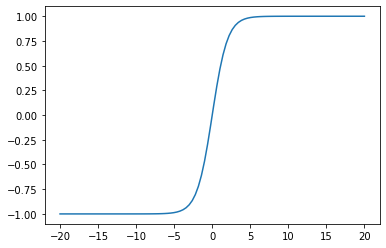

In [3]:
x=np.linspace(-20,20,100)

f=np.zeros(100)
for i in x:
    f=(1-np.exp(-x))/(1+np.exp(-x))

plt.plot(x,f)
plt.show()